In [159]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np


import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
 

data = pd.read_csv('/Users/walkerrowe/Documents/mlbook/brakedata.csv', delimiter=',')



In [174]:
 data

,km,heat,z,pr
0,20000,240,2.720,0.938197
1,5000,98,-57.706,0.000000
2,50000,140,122.420,1.000000
3,8000,260,-45.220,0.000000
4,23790,225,17.835,1.000000
5,24644,245,21.311,1.000000
6,29934,195,42.321,1.000000
7,14045,153,-21.361,0.000000
8,8000,222,-45.334,0.000000
9,9855,149,-38.133,0.000000


In [161]:


labels=data['worn']
data.drop(columns=['worn'],axis=1,inplace=True)

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
km      12 non-null object
heat    12 non-null int64
z       12 non-null float64
pr      12 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 464.0+ bytes


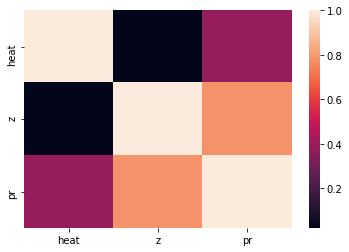

In [162]:
import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [163]:
# data['BloodPressure'].corr( data["BMI"])


In [164]:
 data.columns

Index(['km', 'heat', 'z', 'pr'], dtype='object')

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
km      12 non-null object
heat    12 non-null int64
z       12 non-null float64
pr      12 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 464.0+ bytes


In [166]:
data.shape

(12, 4)

In [167]:

data['km'] = data['km'].apply(lambda l : locale.atoi(l))

In [168]:


model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(4,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [169]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(data, labels,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
12/12 [==============================] - 1s 52ms/step - loss: 9.4022 - acc: 0.4167
Epoch 2/4
12/12 [==============================] - 0s 3ms/step - loss: 9.4022 - acc: 0.4167 
Epoch 3/4
12/12 [==============================] - 0s 3ms/step - loss: 9.4022 - acc: 0.4167
Epoch 4/4
12/12 [==============================] - 0s 7ms/step - loss: 9.4022 - acc: 0.4167


In [170]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)


[array([[-0.03250515,  0.6216933 , -0.39011544,  0.4909305 , -0.06642324,
        -0.09854352, -0.17389518,  0.34651977],
       [-0.4557298 , -0.47238255,  0.10868663, -0.59838104,  0.6709867 ,
        -0.6790803 , -0.6336706 , -0.01926666],
       [ 0.5207433 , -0.13078624, -0.1022194 ,  0.5934158 , -0.5581069 ,
        -0.18050349,  0.48690444, -0.6953913 ],
       [ 0.00533193,  0.32351798,  0.52032024, -0.6098949 ,  0.25063634,
         0.05510837,  0.10735679, -0.03103966]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]
[array([[ 0.10737306, -0.2828189 , -0.5073966 , -0.10257417, -0.19226605,
        -0.36190355, -0.14422515, -0.28909433],
       [ 0.00506538,  0.20782453,  0.03524333,  0.41725856,  0.00647223,
         0.44874007,  0.45149106,  0.591729  ],
       [ 0.40875965,  0.5500762 ,  0.06594092, -0.04264516,  0.5923435 ,
         0.5866677 , -0.0514465 ,  0.26503778],
       [-0.25132826,  0.0332675 ,  0.5957785 , -0.5343018 ,  0.51402813,
     

In [171]:
 
score = model.evaluate(data, labels,verbose=1)

print(score)

12/12 [==============================] - 0s 17ms/step
[9.402222633361816, 0.4166666567325592]


In [172]:
model.predict_classes(np.array([23790,225,17.835,1.000000]).reshape(1,-1))

array([[0]], dtype=int32)

In [173]:
np.array[23790,225,17.835,1.000000].reshape(1,-1)

TypeError: 'builtin_function_or_method' object is not subscriptable